In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
boston_dataset = pd.read_csv("breast_cancer_dataset.csv")

In [ ]:
print(boston_dataset.keys())

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')


In [ ]:
print(boston_dataset.shape)

(569, 10)


In [ ]:
boston_dataset.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [ ]:
boston_dataset.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961,2.731107
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941,0.964018
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
boston_dataset.isnull().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
class                          0
dtype: int64

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
X, y = boston_dataset.iloc[:,:-1], boston_dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
print((explained_variance_score(preds, y_test)))

0.7655317655317656


In [ ]:
predictions= [round(value) for value in preds]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.74%


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.458831


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          2.210975        0.033843        2.210113       0.073441
1          2.013396        0.030787        2.010968       0.075583
2          1.833885        0.025935        1.833827       0.075208
3          1.675273        0.023632        1.672628       0.075905
4          1.527137        0.021568        1.527862       0.072846
5          1.397207        0.023390        1.395943       0.070725
6          1.278356        0.021960        1.278194       0.068995
7          1.172473        0.019720        1.174948       0.067038
8          1.080341        0.017441        1.083463       0.064809
9          0.996170        0.016138        1.001261       0.063991
10         0.921585        0.017405        0.927339       0.062211
11         0.854023        0.017077        0.860638       0.059654
12         0.793697        0.016097        0.802694       0.058672
13         0.741146        0.015732        0.750540       0.05

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.391705
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

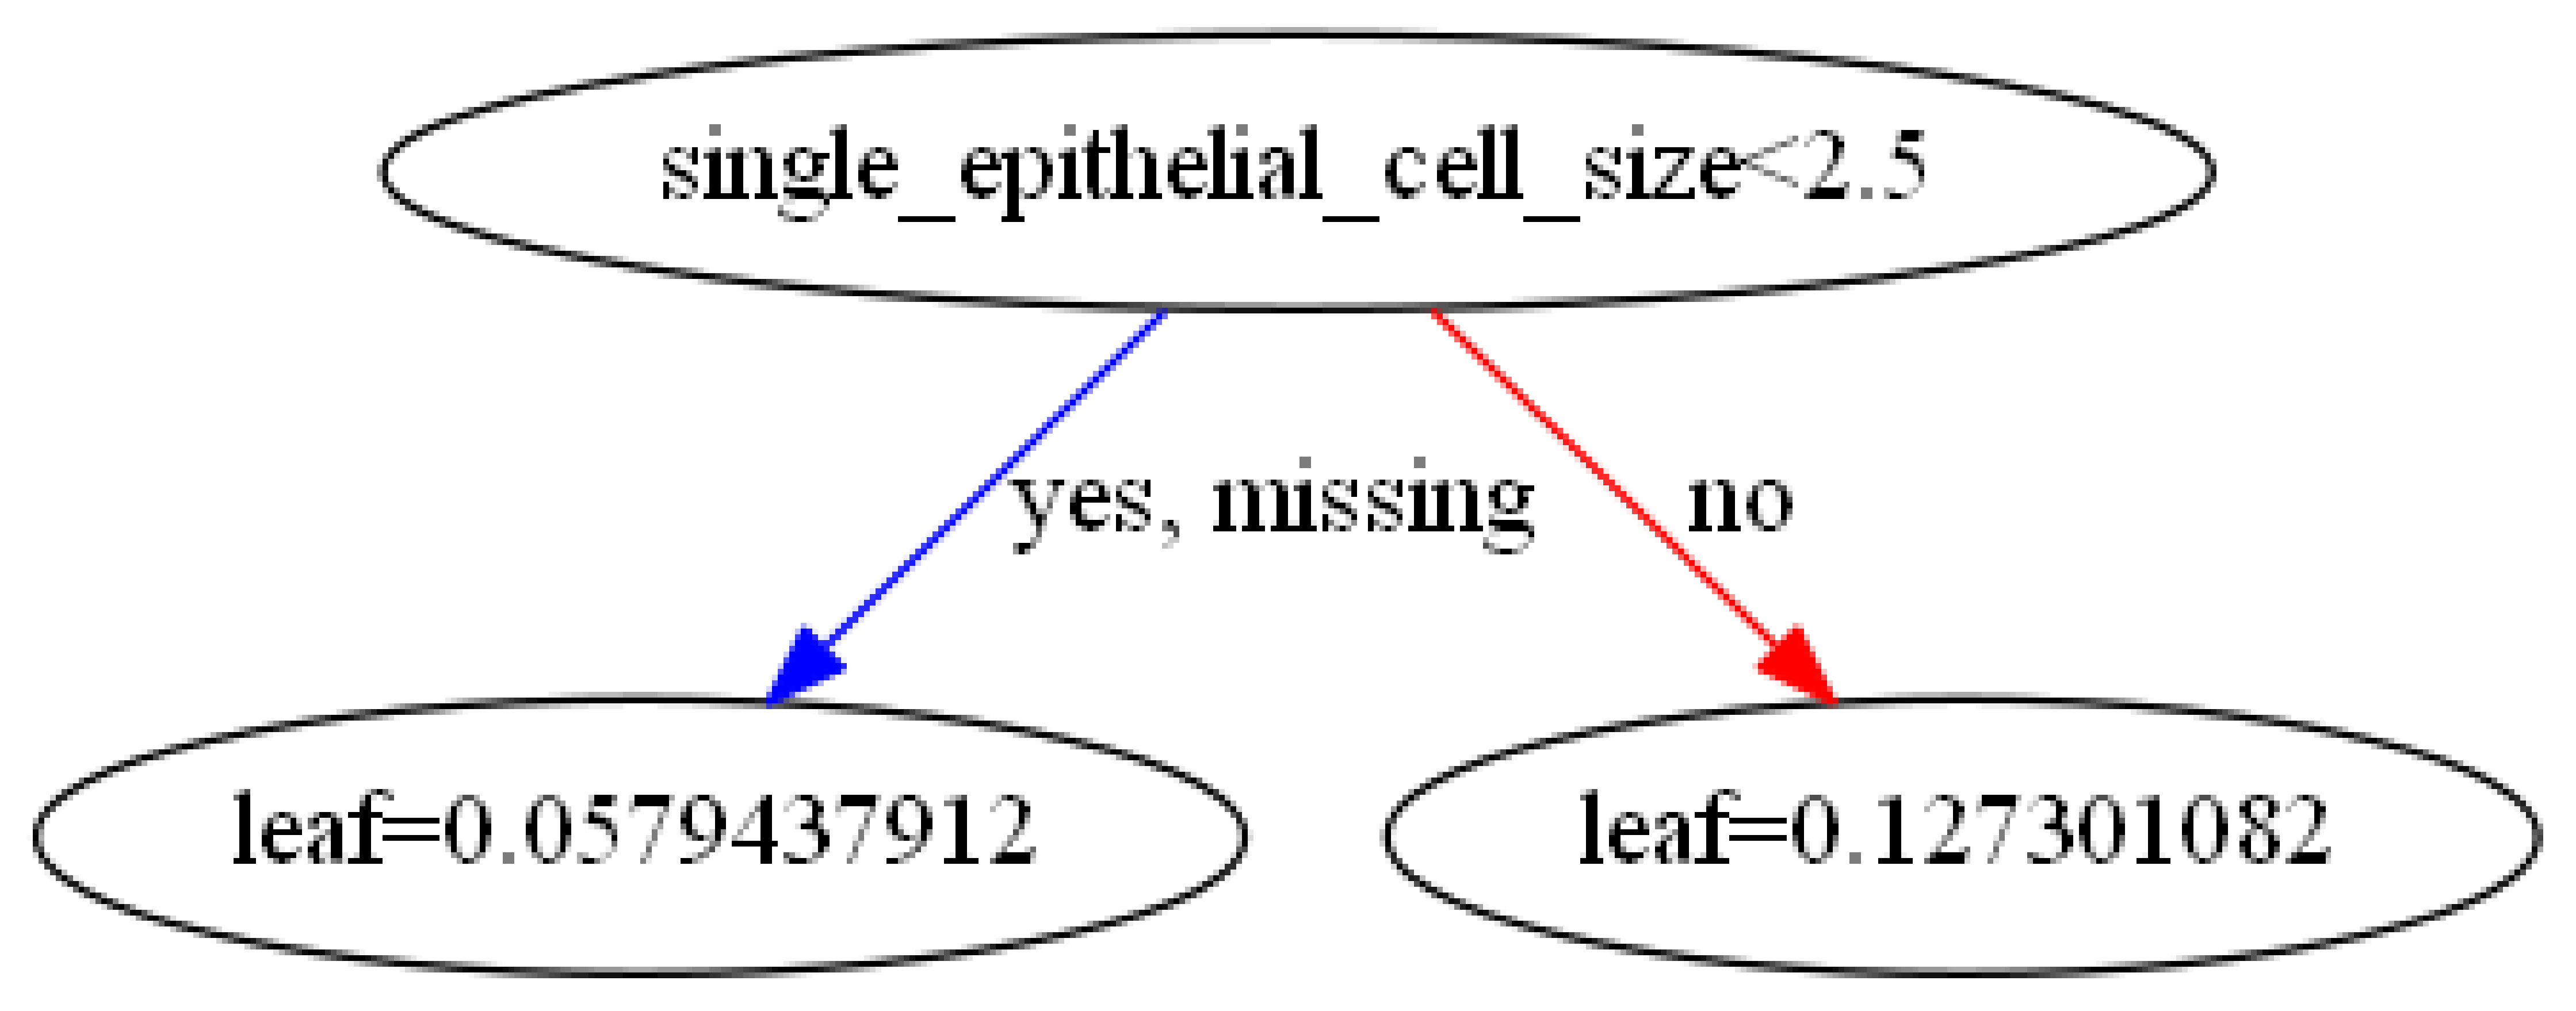

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = [80, 40]
plt.show()

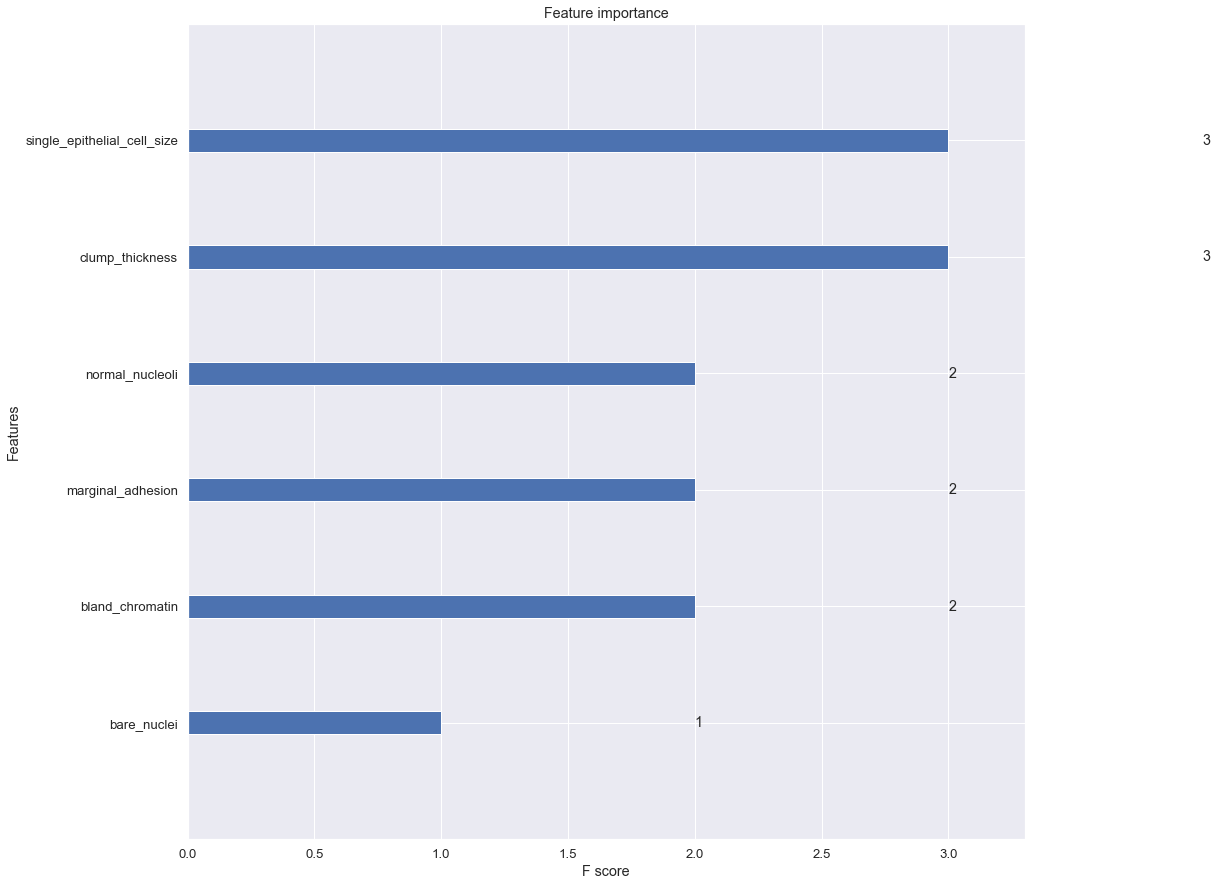

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))



Confusion Matrix:
[[72  1]
 [ 5 36]]


In [ ]:
print("Classification Report")
print(classification_report(y_test, preds))
print("Accuracy of the XGBoost algorithm: %.2f%%" % (accuracy * 100.0))

Classification Report
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        73
           4       0.97      0.88      0.92        41

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy of the XGBoost algorithm: 94.74%


In [ ]:
import pingouin as pg

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)

In [ ]:

boston_dataset.corr().round(2)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
clump_thickness,1.00,0.66,0.67,0.47,0.52,0.06,0.56,0.54,0.36,0.73
uniformity_of_cell_size,0.66,1.00,0.91,0.68,0.75,0.04,0.72,0.72,0.48,0.80
uniformity_of_cell_shape,0.67,0.91,1.00,0.66,0.72,0.01,0.71,0.71,0.45,0.81
marginal_adhesion,0.47,0.68,0.66,1.00,0.58,0.06,0.63,0.60,0.42,0.67
single_epithelial_cell_size,0.52,0.75,0.72,0.58,1.00,0.05,0.59,0.62,0.48,0.67
bare_nuclei,0.06,0.04,0.01,0.06,0.05,1.00,0.02,0.01,0.06,0.08
bland_chromatin,0.56,0.72,0.71,0.63,0.59,0.02,1.00,0.65,0.34,0.72
normal_nucleoli,0.54,0.72,0.71,0.60,0.62,0.01,0.65,1.00,0.42,0.70
mitosis,0.36,0.48,0.45,0.42,0.48,0.06,0.34,0.42,1.00,0.43
class,0.73,0.80,0.81,0.67,0.67,0.08,0.72,0.70,0.43,1.00


Text(0.5, 1, 'Correlation matrix')

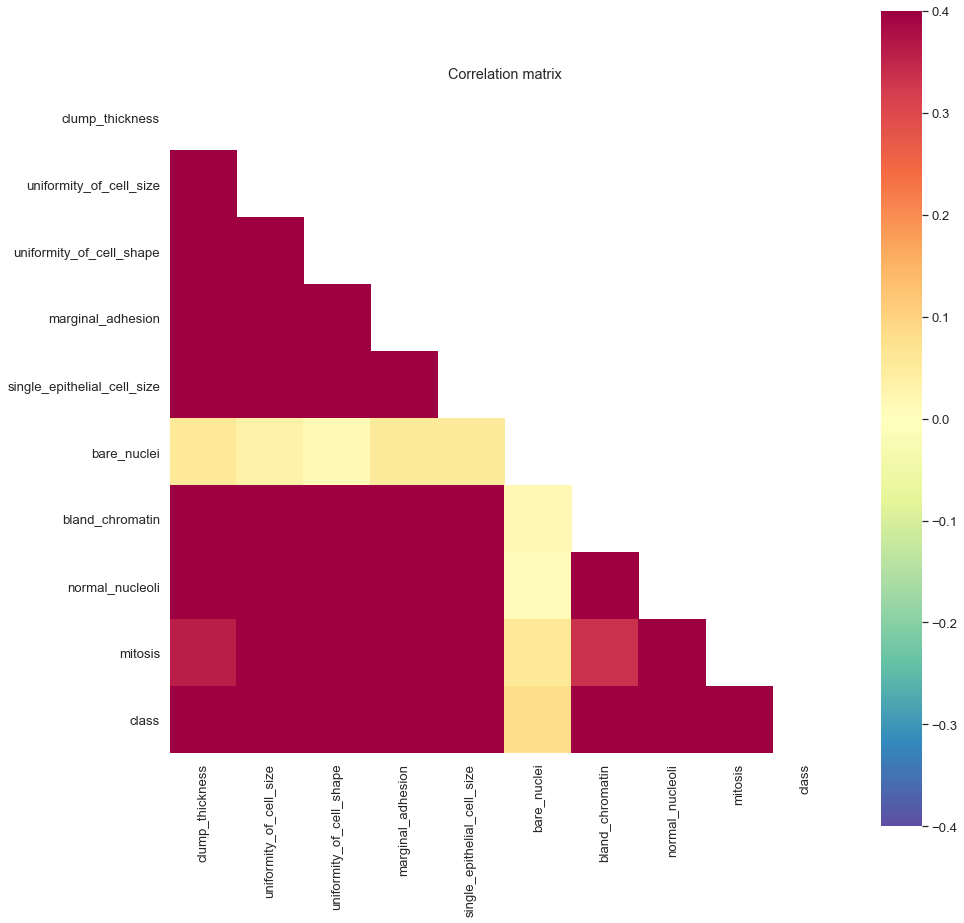

In [ ]:
corrs = boston_dataset.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')